# GeoPandas

**GeoPandas**는 파이썬에서 GIS(Geospatial Information System) 데이터를 처리하고 시각화하는 패키지이다.
파이썬 Pandas와 비슷하게 `GeoDataFrame`과 `GeoSeries` 자료형이 있고 사용법 또한 크게 다르지 않다.

Anaconda Python을 사용중이라면 GeoPandas를 별도로 설치해주어야 한다.

```Shell
# GeoPadnas 패키지 설치
conda install geopandas
```

- 만약 GeoPandas 시각화 시 descartes 패키지가 없다는 에러가 발생하면 패키지 설치가 필요하다.

```Shell
conda install descartes
```

## GeoPandas 예제

GeoPandas 설치가 완료되면 기본적인 사용법을 알아보기 위한 예제를 살펴보자.

GeoPandas는 `import numpy as np` 또는 `import pandas as pd`와 같이 `gpd`라는 이름으로 사용하는 것이 관례이다.

In [1]:
import geopandas as gpd
gpd.__version__

'0.6.1'

GeoPandas는 `datasets` 메소드를 통해 다양한 샘플 데이터를 제공한다.

In [2]:
# Sample Data..
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

countries.tail(3)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."
176,13026129,Africa,S. Sudan,SSD,20880.0,"POLYGON ((30.83385 3.50917, 29.95350 4.17370, ..."


In [3]:
cities.tail(3)

,name,geometry
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)
201,Singapore,POINT (103.85387 1.29498)


## GetPandas 시각화(Visualization)

GeoPandas의 `GeoSeries`와 `GeoDataFrame` 객체의 `plot()` 메소드를 사용하면, 각 객체의 `geometry` 데이터를 시각화할 수 있다.
이 때 `geometry` 데이터는 지리정보를 표현하는 다각형(Polygon), 선(Line), 점(Point)로 정의되어 있다.
`geometry` 데이터는 GeoPandas가 제공하는 데이터에 기본적으로 포함되어 있으나, 우리가 가진 데이터를 사용하여 만들수도 있다.

지리정보를 시각화할 때 위치에 따른 정보의 변화를 함께 표현한다. 이 때 `plot()` 메소드의 `column` 인자에 해당하는 데이터를 입력한다.
GeoPandas는 해당하는 데이터를 색(Color) 정보로 표현한다. 만약 표현하려는 데이터가 카테고리 데이터인 경우 `categorical` 인자를 `True`로 설정한다.

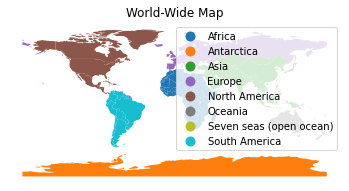

In [6]:
import matplotlib.pyplot as plt

ax = countries.plot(column="continent", legend=True, categorical=True)
ax.set_title("World Map")
ax.set_axis_off()
plt.show()

만약 표현하고자 하는 데이터가 실수(Real Number)라면, 데이터를 구분하는 방법과 갯수를 정의할 수 있다.
구분하는 방법은 `plot()` 메소드의 `scheme` 인자로 설정한다. GeoPandas가 지원하는 방법은 다음과 같다.

- `equal_interva`(동일한 간격으로 구분)
- `quantiles`(4분위수를 계산하여 구분)
- `fisher_jenks`(동일 클래스 내 분산은 줄이고, 다른 클래스와의 분산을 키우는 방식으로 구분)

구분하는 개수는 `plot()` 메소드의 `k` 인자를 조절하는 것이다. (기본값은 5)

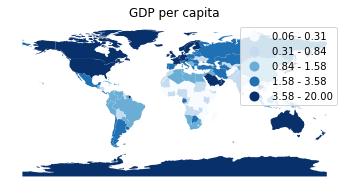

In [8]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

ax = countries.plot(column='gdp_per_cap', legend=True, scheme='quantiles', cmap="Blues", k=5)
ax.set_axis_off()
ax.set_title("GDP per capita")
plt.show()


## Geometry 데이터

GeoPandas는 `Shapely`라는 패키지를 사용하여 `geometry` 데이터를 처리한다.

### Polygon

한 국가의 영토 또는 도시의 구역은 여러 개의 점을 이은 다각형으로 나타낸다. 앞서 `countries` 데이터에서는 다음처럼 Polygon 데이터를 제공한다.


In [9]:
countries.geom_type[:3]

0    MultiPolygon
1         Polygon
2         Polygon
dtype: object

Polygon 데이터는 여러 개의 점(Point)로 구성된다.

POLYGON ((23.48412763844985 53.91249766704114, 23.527535841575 53.47012156840655, 23.80493493011778 53.08973135030607, 23.79919884613338 52.69109935160657, 23.19949384938619 52.48697744405367, 23.50800215016869 52.02364655212473, 23.52707075368437 51.57845408793031, 24.0299857927489 50.70540660257518, 23.92275719574326 50.42488108987874, 23.42650841644439 50.30850576435745, 22.5184501482116 49.47677358661974, 22.77641889821263 49.02739533140962, 22.55813764821175 49.08573802346714, 21.60780805836421 49.47010732685409, 20.88795535653841 49.32877228453583, 20.41583947111985 49.43145335549977, 19.82502282072687 49.21712535256923, 19.32071251799047 49.57157400165919, 18.90957482267632 49.43584585224458, 18.85314415861362 49.49622976337764, 18.39291385262217 49.98862864847075, 17.64944502123899 50.04903839781996, 17.55456709155112 50.36214590107642, 16.86876915860566 50.47397370055603, 16.71947594571444 50.21574656839354, 16.17625328946227 50.42260732685791, 16.23862674323857 50.69773265237

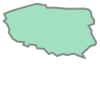

In [11]:
print(countries.geometry[113])
countries.geometry[113]

### Point

어떤 사건이 발생한 위치, 한 국가의 수도, 두 국가간의 중앙점 등은 하나의 **좌표**로 나타낼 수 있다. `cities` 데이터에서는 도시를 하나의 점으로 나타낸다.
이 점을 지도 위에 표시하면 다음과 같다.

In [12]:
cities.geom_type[:3]

0    Point
1    Point
2    Point
dtype: object

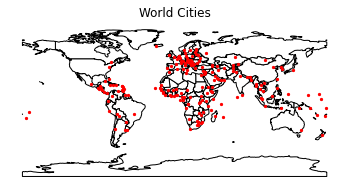

In [13]:
base = countries.plot(color='white', edgecolor="k")
ax = cities.plot(ax=base, marker='o', color='red', markersize=5)
ax.set_axis_off()
ax.set_title("World Cities")
plt.show()